In [40]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [41]:
exp_root = "/media/yesindeed/DATADRIVE1/mount/remote_cse/experiments/med_vlm_benchmark/merged"

df_results = pd.read_csv(os.path.join(exp_root, "results_bootstrap.csv"))

df_results

,model,task,dataset,model_type,trainable_module,path,have_eval_result,have_prediction,have_gpt_score,model_family,...,precision_overall,f1_overall,exact_match_closed,recall_closed,precision_closed,f1_score_closed,accuracy_closed,gpt_score_open,gpt_score_overall,f1_score_overall
0,Qwen2-VL,vqa,SLAKE,general,NaN,vqa/SLAKE/Qwen2-VL/eval_seed0/Qwen2-VL-7B-Inst...,1,1,1,Qwen,...,0.292940,0.318349,0.658576,0.774292,0.661916,0.668470,0.779088,0.673410,0.714850,0.318534
1,Qwen25-VL,vqa,SLAKE,general,NaN,vqa/SLAKE/Qwen25-VL/eval_seed0/Qwen2.5-VL-7B-I...,1,1,1,Qwen,...,0.260505,0.274167,0.627633,0.747762,0.629873,0.634036,0.754682,0.649750,0.690877,0.274209
2,Gemma3,vqa,SLAKE,general,NaN,vqa/SLAKE/Gemma3/eval_seed0/gemma-3-4b-it,1,1,1,Gemma,...,0.038331,0.056352,0.071238,0.657399,0.073495,0.097916,0.720723,0.652927,0.679506,0.056502
3,MedGemma,vqa,SLAKE,medical,NaN,vqa/SLAKE/MedGemma/eval_seed0/medgemma-4b-it,1,1,1,Gemma,...,0.250334,0.265892,0.596903,0.726500,0.598881,0.603805,0.769371,0.759668,0.763464,0.265693
4,InternVL3,vqa,SLAKE,general,NaN,vqa/SLAKE/InternVL3/eval_seed0/InternVL3-8B-hf,1,1,1,Intern,...,0.102121,0.128382,0.209114,0.711309,0.212296,0.238496,0.744927,0.675340,0.702622,0.128349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,VILA,vqa,VQA-RAD,general,ML,vqa/VQA-RAD/VILA1.5/eval_seed0/1epoch-lora8,1,1,1,VILA,...,0.484766,0.472669,0.637849,0.637849,0.637849,0.637849,0.637849,0.448076,0.553582,0.472417
84,VILA-M3,vqa,VQA-RAD,medical,ML,vqa/VQA-RAD/VILA-M3/eval_seed0/1epoch-lora8,1,1,1,VILA,...,0.369967,0.379170,0.537973,0.537973,0.537973,0.537973,0.537973,0.467230,0.506522,0.378829
85,Lingshu,vqa,Harvard-FairVLMed10k,medical,ML,vqa/Harvard-FairVLMed10k/Lingshu/eval_seed0/1e...,1,1,1,Qwen,...,0.580966,0.580271,0.739088,0.739088,0.739088,0.739088,0.739088,0.572615,0.655800,0.580334
86,VILA,vqa,Harvard-FairVLMed10k,general,ML,vqa/Harvard-FairVLMed10k/VILA1.5/eval_seed0/1e...,1,1,1,VILA,...,0.667989,0.647041,0.811056,0.811056,0.811056,0.811056,0.811056,0.560974,0.685936,0.647008


In [42]:
df_results["trainable_module"].fillna(value="ZS", inplace=True)
# df_results["dataset+tune_module"] = df_results["dataset"] + "-" + df_results["trainable_module"]
df_results = df_results.loc[~df_results["model"].isin(
    ["VILA", "VILA-M3"] + ["o3", "gemini-2.5-pro"])]
df_results = df_results.reset_index(drop=True)
df_results

/tmp/ipykernel_1078444/1040965482.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_results["trainable_module"].fillna(value="ZS", inplace=True)


,model,task,dataset,model_type,trainable_module,path,have_eval_result,have_prediction,have_gpt_score,model_family,...,precision_overall,f1_overall,exact_match_closed,recall_closed,precision_closed,f1_score_closed,accuracy_closed,gpt_score_open,gpt_score_overall,f1_score_overall
0,Qwen2-VL,vqa,SLAKE,general,ZS,vqa/SLAKE/Qwen2-VL/eval_seed0/Qwen2-VL-7B-Inst...,1,1,1,Qwen,...,0.292940,0.318349,0.658576,0.774292,0.661916,0.668470,0.779088,0.673410,0.714850,0.318534
1,Qwen25-VL,vqa,SLAKE,general,ZS,vqa/SLAKE/Qwen25-VL/eval_seed0/Qwen2.5-VL-7B-I...,1,1,1,Qwen,...,0.260505,0.274167,0.627633,0.747762,0.629873,0.634036,0.754682,0.649750,0.690877,0.274209
2,Gemma3,vqa,SLAKE,general,ZS,vqa/SLAKE/Gemma3/eval_seed0/gemma-3-4b-it,1,1,1,Gemma,...,0.038331,0.056352,0.071238,0.657399,0.073495,0.097916,0.720723,0.652927,0.679506,0.056502
3,MedGemma,vqa,SLAKE,medical,ZS,vqa/SLAKE/MedGemma/eval_seed0/medgemma-4b-it,1,1,1,Gemma,...,0.250334,0.265892,0.596903,0.726500,0.598881,0.603805,0.769371,0.759668,0.763464,0.265693
4,InternVL3,vqa,SLAKE,general,ZS,vqa/SLAKE/InternVL3/eval_seed0/InternVL3-8B-hf,1,1,1,Intern,...,0.102121,0.128382,0.209114,0.711309,0.212296,0.238496,0.744927,0.675340,0.702622,0.128349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Lingshu,vqa,Harvard-FairVLMed10k,medical,ZS,vqa/Harvard-FairVLMed10k/Lingshu/eval_seed0/Li...,1,1,1,Qwen,...,0.408943,0.450496,0.661465,0.661465,0.661465,0.661465,0.661465,0.600802,0.631116,0.450851
60,Lingshu,vqa,SLAKE,medical,ML,vqa/SLAKE/Lingshu/eval_seed0/1epoch-lora8,1,1,1,Qwen,...,0.661934,0.665505,0.740158,0.740158,0.740158,0.740158,0.740158,0.724588,0.730691,0.665827
61,Lingshu,vqa,PathVQA,medical,ML,vqa/PathVQA/Lingshu/eval_seed0/1epoch-lora8,1,1,1,Qwen,...,0.356514,0.354604,0.634587,0.634587,0.634587,0.634587,0.634587,0.131867,0.383518,0.354572
62,Lingshu,vqa,VQA-RAD,medical,ML,vqa/VQA-RAD/Lingshu/eval_seed0/1epoch-lora8,1,1,1,Qwen,...,0.515615,0.506925,0.656747,0.656747,0.656747,0.656747,0.656747,0.548086,0.608524,0.506121


In [43]:
df_results.loc[df_results["model"].isin(
    ["o3", "gemini-2.5-pro"]), "model_type"] = "general"
df_results.loc[df_results["model"] == "o3"]

,model,task,dataset,model_type,trainable_module,path,have_eval_result,have_prediction,have_gpt_score,model_family,...,precision_overall,f1_overall,exact_match_closed,recall_closed,precision_closed,f1_score_closed,accuracy_closed,gpt_score_open,gpt_score_overall,f1_score_overall


In [44]:
df_results["model"].value_counts()

model
Qwen2-VL     8
Qwen25-VL    8
Gemma3       8
MedGemma     8
InternVL3    8
LLaVA-1.5    8
LLaVA-Med    8
Lingshu      8
Name: count, dtype: int64

In [45]:
data_order = [
    "VQA-RAD",
    "PathVQA",
    "SLAKE",
    "Harvard-FairVLMed10k",
]

model_order = [
    "LLaVA-1.5",
    "Qwen2-VL",
    "Qwen25-VL",
    "Gemma3",
    "InternVL3",
]

OOD_datasets = ["Harvard-FairVLMed10k"]

ID_dict = {
    "LLaVA-Med": ["VQA-RAD", "PathVQA", "SLAKE"],
    "MedGemma": ["VQA-RAD", "PathVQA", "SLAKE"],
    "Lingshu": ["VQA-RAD", "PathVQA", "SLAKE"],
    "gemini-2.5-pro": ["VQA-RAD", "PathVQA", "SLAKE", "Harvard-FairVLMed10k"],
    "o3": ["VQA-RAD", "PathVQA", "SLAKE", "Harvard-FairVLMed10k"],
}

is_ood = []

for dataset, model in zip(df_results["dataset"].tolist(), df_results["model"].tolist()):
    if not model in ID_dict.keys():
        is_ood.append(1)
    elif dataset not in ID_dict[model]:
        is_ood.append(1)
    else:
        is_ood.append(0)

df_results["is_ood"] = is_ood

df_results

,model,task,dataset,model_type,trainable_module,path,have_eval_result,have_prediction,have_gpt_score,model_family,...,f1_overall,exact_match_closed,recall_closed,precision_closed,f1_score_closed,accuracy_closed,gpt_score_open,gpt_score_overall,f1_score_overall,is_ood
0,Qwen2-VL,vqa,SLAKE,general,ZS,vqa/SLAKE/Qwen2-VL/eval_seed0/Qwen2-VL-7B-Inst...,1,1,1,Qwen,...,0.318349,0.658576,0.774292,0.661916,0.668470,0.779088,0.673410,0.714850,0.318534,1
1,Qwen25-VL,vqa,SLAKE,general,ZS,vqa/SLAKE/Qwen25-VL/eval_seed0/Qwen2.5-VL-7B-I...,1,1,1,Qwen,...,0.274167,0.627633,0.747762,0.629873,0.634036,0.754682,0.649750,0.690877,0.274209,1
2,Gemma3,vqa,SLAKE,general,ZS,vqa/SLAKE/Gemma3/eval_seed0/gemma-3-4b-it,1,1,1,Gemma,...,0.056352,0.071238,0.657399,0.073495,0.097916,0.720723,0.652927,0.679506,0.056502,1
3,MedGemma,vqa,SLAKE,medical,ZS,vqa/SLAKE/MedGemma/eval_seed0/medgemma-4b-it,1,1,1,Gemma,...,0.265892,0.596903,0.726500,0.598881,0.603805,0.769371,0.759668,0.763464,0.265693,0
4,InternVL3,vqa,SLAKE,general,ZS,vqa/SLAKE/InternVL3/eval_seed0/InternVL3-8B-hf,1,1,1,Intern,...,0.128382,0.209114,0.711309,0.212296,0.238496,0.744927,0.675340,0.702622,0.128349,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Lingshu,vqa,Harvard-FairVLMed10k,medical,ZS,vqa/Harvard-FairVLMed10k/Lingshu/eval_seed0/Li...,1,1,1,Qwen,...,0.450496,0.661465,0.661465,0.661465,0.661465,0.661465,0.600802,0.631116,0.450851,1
60,Lingshu,vqa,SLAKE,medical,ML,vqa/SLAKE/Lingshu/eval_seed0/1epoch-lora8,1,1,1,Qwen,...,0.665505,0.740158,0.740158,0.740158,0.740158,0.740158,0.724588,0.730691,0.665827,0
61,Lingshu,vqa,PathVQA,medical,ML,vqa/PathVQA/Lingshu/eval_seed0/1epoch-lora8,1,1,1,Qwen,...,0.354604,0.634587,0.634587,0.634587,0.634587,0.634587,0.131867,0.383518,0.354572,0
62,Lingshu,vqa,VQA-RAD,medical,ML,vqa/VQA-RAD/Lingshu/eval_seed0/1epoch-lora8,1,1,1,Qwen,...,0.506925,0.656747,0.656747,0.656747,0.656747,0.656747,0.548086,0.608524,0.506121,0


In [46]:
def format_boot_df(df_index):
    df_index = df_index.reset_index(drop=True)

    dfs = []
    for i in range(len(df_index)):
        item = df_index.iloc[i]

        df_boot_i = pd.read_csv(os.path.join(exp_root, item["path"], "bootstrap_result.csv"))[:1000]
        df_boot_i = df_boot_i * 100
        df_boot_i["model"] = item["model"]
        df_boot_i["dataset"] = item["dataset"]
        df_boot_i["model_type"] = item["model_type"]
        df_boot_i["trainable_module"] = item["trainable_module"]
        dfs.append(df_boot_i)

    return pd.concat(dfs).reset_index(drop=True)


def try_fetch(list, index):
    try:
        return list[index]
    except:
        return None


def get_med_stats(df, metric):
    assert len(df["dataset"].unique()) == 1
    dataset = df["dataset"].unique()[0]

    df_med = df.loc[df["model_type"] == "medical"]
    df_zs = df_med.loc[(df_med["trainable_module"] == "ZS") & (df_med["is_ood"] == 0)]
    df_sft = df_med.loc[(df_med["trainable_module"] == "ML") & (df_med["is_ood"] == 1)]

    zs_metric = (
        np.sort(
            np.array(df_zs[metric]),
        )
        * 100
    )
    sft_metric = (
        np.sort(
            np.array(df_sft[metric]),
        )
        * 100
    )
    best_zs, second_zs = try_fetch(zs_metric, -1), try_fetch(zs_metric, -2)
    best_sft, second_sft = try_fetch(sft_metric, -1), try_fetch(sft_metric, -2)

    return (best_zs, second_zs), (best_sft, second_sft)


def update_min(current_min, value):
    return min(current_min, value)


def update_max(current_max, value):
    return max(current_max, value)

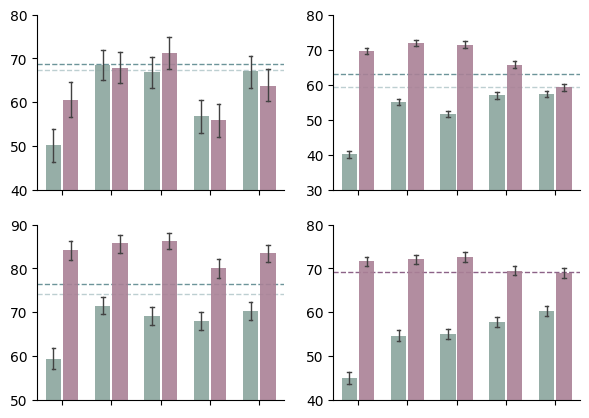

In [48]:
metric = "gpt_score_overall"
# metric = "f1_score_overall"

fig, axes = plt.subplots(2, 2, figsize=(7, 5))

for i_plot, dataset in enumerate(data_order):
    i_row, i_col = i_plot // 2, i_plot % 2
    ax = axes[i_row, i_col]
    df_dataset = df_results.loc[(df_results["dataset"] == dataset)]

    df_plot = format_boot_df(
        df_dataset.loc[df_dataset["model_type"] == "general"])

    df_plot["model"] = pd.Categorical(
        df_plot["model"], categories=model_order, ordered=True)
    df_plot = df_plot.sort_values(by="model")

    min_value, max_value = df_plot[metric].min(), df_plot[metric].max()

    (best_med_zs, second_med_zs), (best_med_sft,
                                   second_med_sft) = get_med_stats(df_dataset, metric)

    if best_med_zs is not None:
        min_value = update_min(min_value, best_med_zs)
        max_value = update_max(max_value, best_med_zs)
        ax.axhline(y=best_med_zs, color="#5c898e",
                   ls="--", lw=1, zorder=1, alpha=0.9)
    if second_med_zs is not None:
        min_value = update_min(min_value, second_med_zs)
        max_value = update_max(max_value, second_med_zs)
        ax.axhline(y=second_med_zs, color="#5c898e",
                   ls="--", lw=1, zorder=1, alpha=0.4)
    if best_med_sft is not None:
        min_value = update_min(min_value, best_med_sft)
        max_value = update_max(max_value, best_med_sft)
        ax.axhline(y=best_med_sft, color="#80517a",
                   ls="--", lw=1, zorder=1, alpha=0.9)
    if second_med_sft is not None:
        if abs(best_med_sft - second_med_sft) > 3:
            min_value = update_min(min_value, second_med_sft)
            max_value = update_max(max_value, second_med_sft)
            ax.axhline(y=second_med_sft, color="#80517a",
                       ls="--", lw=1, zorder=1, alpha=0.4)
    # if dataset not in OOD_datasets:
    #     min_value = min(min_value, second_med_zs)
    #     max_value = max(max_value, best_med_zs)

    #     ax.axhline(y=best_med_zs, color="#5c898e",
    #                ls="--", lw=1, zorder=1, alpha=0.9)
    #     ax.axhline(y=second_med_zs, color="#5c898e",
    #                ls="--", lw=1, zorder=1, alpha=0.6)
    # else:
    #     min_value = min(min_value, second_med_sft)
    #     max_value = max(max_value, best_med_sft)

    #     ax.axhline(y=best_med_sft, color="#80517a",
    #                ls="--", lw=1, zorder=1, alpha=0.9)
    #     # ax.axhline(y=second_med_sft, color="black", ls="--", lw=1, zorder=1)

    min_ylim, max_ylim = int(min_value / 10) * \
        10, (int(max_value / 10) + 1) * 10
    max_ylim = min(100, max_ylim)

    sns.barplot(
        data=df_plot,
        x="model",
        y=metric,
        hue="trainable_module",
        ax=ax,
        legend=False,
        errorbar=("pi", 95),
        err_kws={"linewidth": 1},
        n_boot=1000,
        capsize=0.15,
        width=0.7,
        gap=0.1,
        palette=[
            "#86aaa0",
            "#b17a96",
        ],
        hue_order=["ZS", "ML"],
        alpha=0.9,
    )
    # sns.boxplot(data=df_plot, x="model", y=metric, hue="trainable_module", ax=ax, legend=False)
    ax.set_ylim([min_ylim, max_ylim])
    # ax.set_ylim([30, 90])
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.spines["top"].set_visible(False)
    # ax2.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)

plt.savefig(
    "heatmap/vqa_bar_rqgap.png",
    dpi=1000,
    bbox_inches="tight",
)

# old version

In [ ]:
def format_boot_df(df_index):
    df_index = df_index.reset_index(drop=True)

    dfs = []
    for i in range(len(df_index)):
        item = df_index.iloc[i]

        df_boot_i = pd.read_csv(os.path.join(exp_root, item["path"], "bootstrap_result.csv"))[:1000]
        df_boot_i = df_boot_i * 100
        df_boot_i["model"] = item["model"]
        df_boot_i["dataset"] = item["dataset"]
        df_boot_i["model_type"] = item["model_type"]
        df_boot_i["trainable_module"] = item["trainable_module"]
        dfs.append(df_boot_i)

    return pd.concat(dfs).reset_index(drop=True)


def get_med_stats(df, metric):
    assert len(df["dataset"].unique()) == 1
    dataset = df["dataset"].unique()[0]

    df_med = df.loc[df["model_type"] == "medical"]
    df_zs = df_med.loc[df_med["trainable_module"] == "ZS"]
    df_sft = df_med.loc[df_med["trainable_module"] == "ML"]

    zs_metric = (
        np.sort(
            np.array(df_zs[metric]),
        )
        * 100
    )
    sft_metric = (
        np.sort(
            np.array(df_sft[metric]),
        )
        * 100
    )
    best_zs, second_zs = zs_metric[-1], zs_metric[-2]
    best_sft, second_sft = sft_metric[-1], sft_metric[-2]

    return (best_zs, second_zs), (best_sft, second_sft)

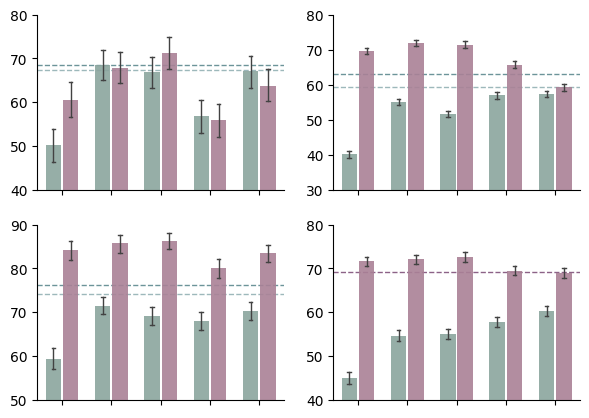

In [219]:
metric = "gpt_score_overall"

fig, axes = plt.subplots(2, 2, figsize=(7, 5))

for i_plot, dataset in enumerate(data_order):
    i_row, i_col = i_plot // 2, i_plot % 2
    ax = axes[i_row, i_col]
    df_dataset = df_results.loc[(df_results["dataset"] == dataset)]

    df_plot = format_boot_df(df_dataset.loc[df_dataset["model_type"] == "general"])

    df_plot["model"] = pd.Categorical(df_plot["model"], categories=model_order, ordered=True)
    df_plot = df_plot.sort_values(by="model")

    min_value, max_value = df_plot[metric].min(), df_plot[metric].max()

    (best_med_zs, second_med_zs), (best_med_sft, second_med_sft) = get_med_stats(df_dataset, metric)

    if dataset not in OOD_datasets:
        min_value = min(min_value, second_med_zs)
        max_value = max(max_value, best_med_zs)

        ax.axhline(y=best_med_zs, color="#5c898e", ls="--", lw=1, zorder=1, alpha=0.9)
        ax.axhline(y=second_med_zs, color="#5c898e", ls="--", lw=1, zorder=1, alpha=0.6)
    else:
        min_value = min(min_value, second_med_sft)
        max_value = max(max_value, best_med_sft)

        ax.axhline(y=best_med_sft, color="#80517a", ls="--", lw=1, zorder=1, alpha=0.9)
        # ax.axhline(y=second_med_sft, color="black", ls="--", lw=1, zorder=1)

    min_ylim, max_ylim = int(min_value / 10) * 10, (int(max_value / 10) + 1) * 10

    sns.barplot(
        data=df_plot,
        x="model",
        y=metric,
        hue="trainable_module",
        ax=ax,
        legend=False,
        errorbar=("pi", 95),
        err_kws={"linewidth": 1},
        n_boot=1000,
        capsize=0.15,
        width=0.7,
        gap=0.1,
        palette=[
            "#86aaa0",
            "#b17a96",
        ],
        hue_order=["ZS", "ML"],
        alpha=0.9,
    )
    # sns.boxplot(data=df_plot, x="model", y=metric, hue="trainable_module", ax=ax, legend=False)
    ax.set_ylim([min_ylim, max_ylim])
    # ax.set_ylim([30, 90])
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.spines["top"].set_visible(False)
    # ax2.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)

plt.savefig(
    "heatmap/vqa_bar_rqgap.png",
    dpi=1000,
    bbox_inches="tight",
)

In [215]:
df_test = (
    pd.read_csv(
        "/media/yesindeed/DATADRIVE1/mount/remote_cse/experiments/med_vlm_benchmark/merged/vqa/VQA-RAD/Qwen25-VL/eval_seed0/qwen2_5vl-7b-lora-ML-merged/bootstrap_result.csv"
    )
    * 100
)
df_test["gpt_score_overall"].quantile(0.95)

np.float64(74.38192904656319)

In [216]:
min_ylim

40

In [217]:
axes[i_plot]

IndexError: index 3 is out of bounds for axis 0 with size 2

In [ ]:
i_plot

0